In [2]:
import notebook_setup
import random
import pandas as pd
import logging

import jax.numpy as jnp
import pandas as pd

import src.utils.pandas_utils as pdu

from src.generators.shift_requirements import (
    ShiftRequirementsGenerator,
    SRGeneratorParams,
    StochasticRoundingParams,
    GradientDescentParams,
)
from src.entities.agents import SchedulesAgent

from src.generators.schedules_generator import (
    SchedulesGenerator,
    SchedulesRequirement,
    SchedGeneratorParams,
)

from src.entities.data_classes import Shift
from src.entities.shifts import RequirementShift, SchedulesShift

In [13]:
# Main Parameters
generation_weeks = 4

# Defining a series of shift blueprints, in this example all shifts starting an ODD hours
# and that with a duration 9 INTERVALS


db_shifts = [
    Shift(
        id=f"S{int(start):02}",
        task="chat",
        start_time=float(start),
        duration=9.0,
    )
    for start in [
        # 0,
        # 1,
        # 2,
        # 3,
        # 4,
        # 5,
        6.0,
        7.0,
        8.0,
        9.0,
        # 10,
        # 11,
        12.0,
        # 13,
        # 14,
        15.0,
        # 16,
        # 17,
        18.0,
        # 19,
        # 20,
        # 21,
        # 22,
        23.0,
    ]
]

req_shifts = [
    RequirementShift(
        shift,
        daily_intervals=24,  # dividing start times in intervals of 24 hours
        coverage=jnp.ones(9) * 0.95,  # Shifts provide 95% of coverage instead of 100%
    )
    for shift in db_shifts
]


sr_gen = ShiftRequirementsGenerator(shifts=req_shifts, days=generation_weeks * 7)

# Custom Parameters
sr_gen.set_params(
    SRGeneratorParams(
        daily_intervals=24,
        asymetric_weight=0.9,
        gradient_descent=GradientDescentParams(
            learning_rate=1, num_iterations=5000, snapshot_length=50
        ),
        stochastic_rounding=StochasticRoundingParams(section_size=24, passes=50),
    )
)

# Get hourly requirements
int_reqs = pd.read_csv("hourly_reqs.csv").requirement.values

# Generate Requirements
shift_reqs = sr_gen.generate(interval_reqs=int_reqs)

--- GRADIENT DESCENT ---
Iteration 0: Error = 18.569625854492188
Iteration 50: Error = 0.3411919176578522
Iteration 100: Error = 0.21687304973602295
Iteration 150: Error = 0.18925517797470093
Iteration 200: Error = 0.17800015211105347
Iteration 250: Error = 0.17222073674201965
Iteration 300: Error = 0.16890200972557068
Iteration 350: Error = 0.16683989763259888
Iteration 400: Error = 0.16547876596450806
Iteration 450: Error = 0.16453644633293152
Iteration 500: Error = 0.16385845839977264
Iteration 550: Error = 0.16335538029670715
Iteration 600: Error = 0.16297268867492676
Iteration 650: Error = 0.16267572343349457
Iteration 700: Error = 0.16244152188301086
Iteration 750: Error = 0.16225439310073853
Iteration 800: Error = 0.16210326552391052
Iteration 850: Error = 0.16198018193244934
Iteration 900: Error = 0.16187921166419983
Iteration 950: Error = 0.16179585456848145
Iteration 1000: Error = 0.16172680258750916
Iteration 1050: Error = 0.1616692841053009
Iteration 1100: Error = 0.1616212

<Axes: >

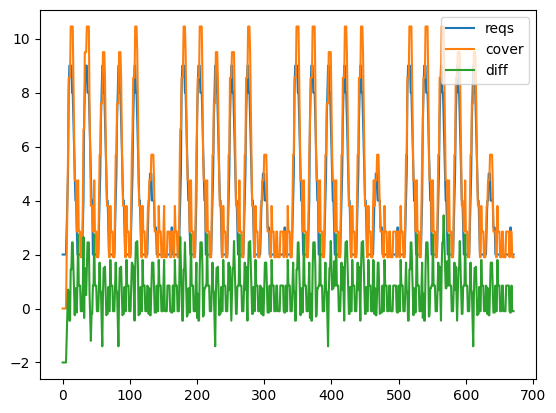

In [16]:
pdu.shift_reqs_coverage_df(shift_reqs).plot()

In [18]:
pdu.shift_reqs_results_df(shift_reqs).pivot(
    columns="shift_name", index="day_index", values="req"
)

shift_name,S06,S07,S08,S09,S12,S15,S18,S23
day_index,,,,,,,,
0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0
1,2.0,3.0,2.0,3.0,1.0,2.0,1.0,2.0
2,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
3,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,2.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0
5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
6,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
7,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
8,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0


In [6]:
from faker import Faker
import random

faker = Faker()

# GENERATE AGENTS

agent_pool = [
    SchedulesAgent(
        faker.email(),
        tasks=random.choice([["task1"], ["task1", "task2"]]),
        consec_work_carry=-2,
    )
    for _ in range(100)
]

# CREATE AVAILABILITIES

off = SchedulesShift.new_off_shift()
vac = SchedulesShift.new_all_day_shift(id="vac", task="vac", type="pto")
buddy = SchedulesShift.new_work_shift(
    id="buddy_t", start_time=8.0, duration=9.0, task="buddy"
)

availability_examples = [
    [None, vac, off, off, None, None, None],
    [buddy, buddy, buddy, buddy, buddy, off, off],
    [None, None, None, None, None, off, off],
    [None, None, off, off, None, None, None],
    [buddy, buddy, None, None, None, None, None],
    [None, None, None, None, None, off, None],
    [None, None, None, None, None, None, off],
    [vac, vac, vac, vac, vac, off, off],
    [None, None, None, None, None, off, off],
    [None, off, None, None, None, off, None],
]

no_avail_week = [None, None, None, None, None, None, None]

for _ in range(20):
    availability_examples.append(no_avail_week)

availabilities = dict()

for agent in agent_pool:
    if random.random() > 0.65:
        choices = [
            random.choice(availability_examples) for _ in range(generation_weeks)
        ]
        availabilities[agent.id] = []
        for choice in choices:
            availabilities[agent.id] = [*availabilities[agent.id], *choice]

In [7]:
# CONVERT REQUIREMENT SHIFTS INTO SCHEDULES SHIFTS

shifts = [SchedulesShift.from_reqs_shift(req_shift, "work") for req_shift in req_shifts]

# SETUP SCHEDULES SCHEDULES GENERATOR
## setup requirements
schedules_requirements = SchedulesRequirement(
    shifts=tuple(shifts), values=shift_reqs.weights.reshape(-1, len(shifts)).transpose()
)
## setup params (if non-default)
params = SchedGeneratorParams(error_type="rel", rel_error_safety_factor=20, passes=2)

## setup schedules
schedules = SchedulesGenerator.setup_schedules(
    agents=random.sample(agent_pool, 23),
    availability_dict=availabilities,
    num_weeks=generation_weeks,
)

schedules_generator = SchedulesGenerator(schedules_requirements, schedules, params)
schedules_output = schedules_generator.generate(generation_weeks)

In [8]:
pd.DataFrame(
    [
        [shift.id for shift in schedules.scheduled_shifts.shifts]
        for schedules in schedules_output
    ]
).to_csv("schedules_output.csv")

In [9]:
coverage = None
reqs = None

for week in range(generation_weeks):
    coverage = (
        jnp.concat(
            [coverage, schedules_generator.get_full_schedules_weekly_coverage(week)],
            axis=1,
        )
        if coverage != None
        else schedules_generator.get_full_schedules_weekly_coverage(week)
    )

    reqs = (
        jnp.concat(
            [reqs, schedules_generator.requirements.get_weekly_values(week)], axis=1
        )
        if reqs != None
        else schedules_generator.requirements.get_weekly_values(week)
    )

pd.DataFrame(
    coverage, index=map(lambda x: x.id, schedules_generator.requirement_shifts)
).to_csv("coverage.csv")

pd.DataFrame(
    reqs, index=map(lambda x: x.id, schedules_generator.requirement_shifts)
).to_csv("reqs.csv")